# Exercises

### Do your work for this exercise in a file named explore.

### 1. Spam Data

In [17]:
import re
import unicodedata
import pandas as pd
import nltk
import prepare
import acquire
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from env import user, password, host

### a. Load the spam data set.

In [2]:
def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
def clean(text):
    '''Simplified text cleaning function'''
    # convert to lower case
    text = text.lower()
    
    # normalize the letters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # remove special characters
    tect = re.sub(r"[^a-z0-9\s]", '', text)
    return text

In [4]:
# Join all the text into one variable
text_collection = " ".join(df.text)

In [5]:
# length of text
len(text_collection)

451993

In [6]:
# Cleaning the text
text_collection = clean(text_collection)
len(text_collection)

451550

In [7]:
# Removing stopwords
text_collection = prepare.remove_stopwords(text_collection)
len(text_collection)

334911

In [8]:
# combine all messages in single string by label
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [9]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [10]:
# concat all frequencies together into a dataframe
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
i,2175,36,2211
you,1665,252,1917
to,1544,682,2226
the,1113,204,1317
a,1049,373,1422


### b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

Text(0.5, 1.0, 'Top 10 most common spam dataset bigrams')

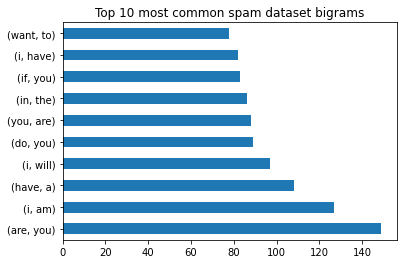

In [14]:
# Bigrams
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam dataset bigrams')

Text(0.5, 1.0, 'Top 10 most common spam dataset bigrams')

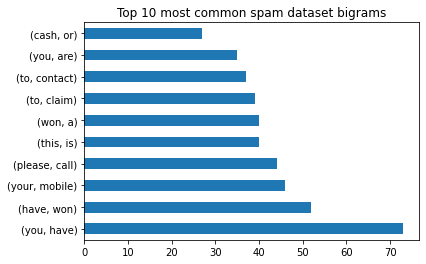

In [15]:
# Bigrams
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam dataset bigrams')

(-0.5, 399.5, 199.5, -0.5)

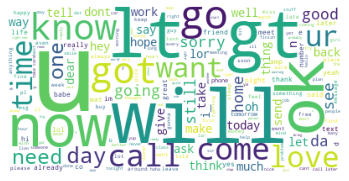

In [18]:
# word cloud ham
img = WordCloud(background_color='white').generate(ham_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

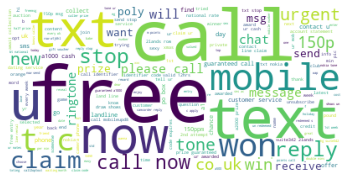

In [19]:
# word cloud spam
img = WordCloud(background_color='white').generate(spam_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')

### c. Is there any overlap in the bigrams for the spam data and the ham data?

In [ ]:
# We can see some overlap.

### d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

###### Ham

Text(0.5, 1.0, 'Top 10 most common ham dataset trigrams')

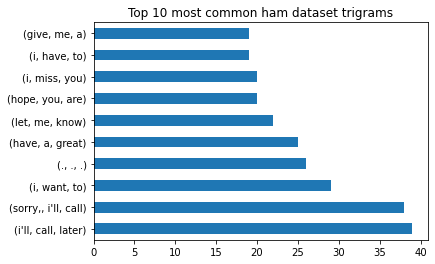

In [23]:
# trigrams
pd.Series(nltk.trigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham dataset trigrams')

### Spam

Text(0.5, 1.0, 'Top 10 most common spam dataset trigrams')

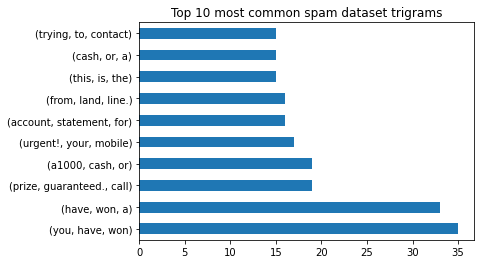

In [24]:
# trigrams
pd.Series(nltk.trigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam dataset trigrams')

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [25]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [26]:
# Acquiring blog articles from  acquire modules as DataFrame
blog_df = acquire.get_blog_articles()

In [27]:
blog_df.head()

,title,content,date published
0,Codeup Dallas Open House,Come join us for the re-opening of our Dallas ...,"Nov 30, 2021"
1,Codeup’s Placement Team Continues Setting Records,Our Placement Team is simply defined as a grou...,"Nov 19, 2021"
2,"IT Certifications 101: Why They Matter, and Wh...","AWS, Google, Azure, Red Hat, CompTIA…these are...","Nov 18, 2021"
3,A rise in cyber attacks means opportunities fo...,"In the last few months, the US has experienced...","Nov 17, 2021"
4,Use your GI Bill® benefits to Land a Job in Tech,"As the end of military service gets closer, ma...","Nov 4, 2021"


In [28]:
# Joining all articles contents in a single string
all_article_words = ' '.join(blog_df.content)

In [29]:
# Was seeing contents of all_article_words but now commentted.
# all_article_words
len(all_article_words)

40053

In [30]:
# Preparing all_article_words using the function in the prepare module
all_article_words = prepare.prep_string(all_article_words)
len(all_article_words)

28323

Text(0.5, 1.0, 'Top 10 most common article bigrams')

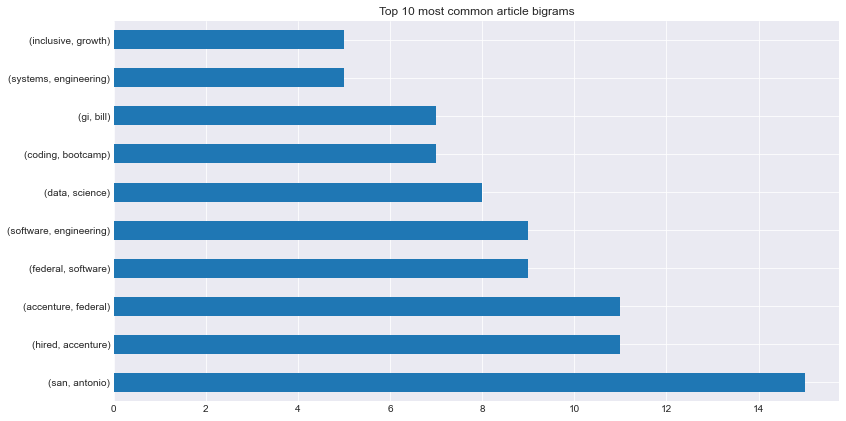

In [31]:
# Bigrams
pd.Series(nltk.bigrams(all_article_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common article bigrams')

Text(0.5, 1.0, 'Top 10 most common article bigrams')

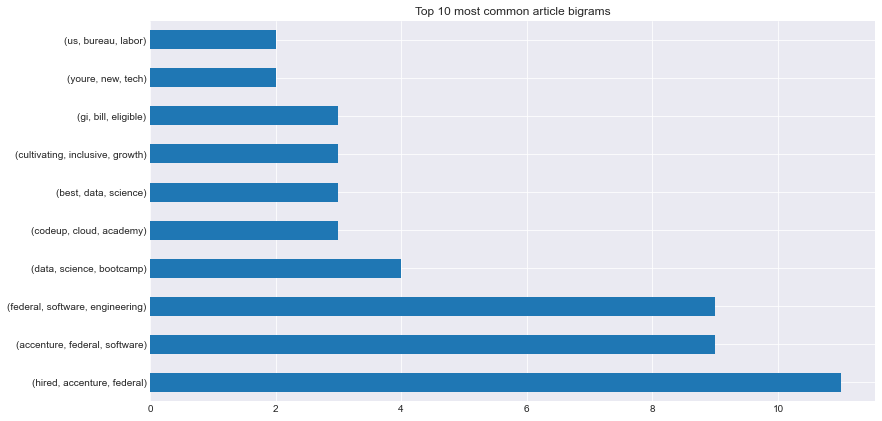

In [32]:
# Trigrams
pd.Series(nltk.trigrams(all_article_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common article bigrams')

In [33]:
# bigrams from DataFrame
all_article_words_bigram = pd.DataFrame(nltk.bigrams(all_article_words.split()))
all_article_words_bigram 

,0,1
0,come,join
1,join,us
2,us,reopening
3,reopening,dallas
4,dallas,campus
...,...,...
3685,way,first
3686,first,apply
3687,apply,apply
3688,apply,pride


In [34]:
# trigrams from DataFrame
all_article_words_trigram = pd.DataFrame(nltk.trigrams(all_article_words.split()))
all_article_words_trigram.head()

,0,1,2
0,come,join,us
1,join,us,reopening
2,us,reopening,dallas
3,reopening,dallas,campus
4,dallas,campus,drinks


(-0.5, 399.5, 199.5, -0.5)

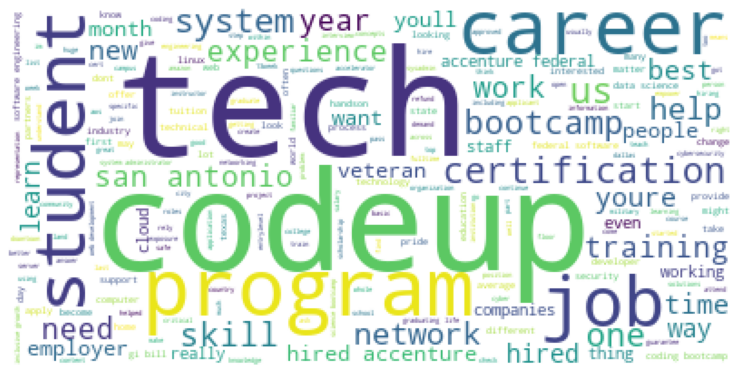

In [35]:
img = WordCloud(background_color='white').generate(all_article_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [36]:
# Acquiring blog articles from  acquire modules as DataFrame
news_df = acquire.get_inshorts_articles()

In [37]:
news_df

,title,author,content,date,category
0,Huge boost for the logistics sector: Windmill ...,Roshan Gupta,FM Nirmala Sitharaman stated that PM Gati Shak...,"09 Feb 2022,Wednesday",business
1,Bill Gates writes a book on how to make COVID-...,Pragya Swastik,Microsoft Co-founder Bill Gates has written a ...,"09 Feb 2022,Wednesday",business
2,Glenmark launches anti-COVID-19 nasal spray th...,Kiran Khatri,"Glenmark Pharma, in partnership with Canada-ba...","09 Feb 2022,Wednesday",business
3,"25-yr-old employee's death sparks overwork, '9...",Pragya Swastik,A 25-year-old content moderator working for Ch...,"09 Feb 2022,Wednesday",business
4,Joe Biden acknowledges Tesla as 'US' largest e...,Kiran Khatri,US President Joe Biden on Tuesday acknowledged...,"09 Feb 2022,Wednesday",business
...,...,...,...,...,...
94,"Lataji agreed to sing for The Kashmir Files, r...",Kriti Kambiri,Filmmaker Vivek Ranjan Agnihotri has revealed ...,"09 Feb 2022,Wednesday",entertainment
95,Gay men marrying lesbian women not ideal but e...,Kriti Kambiri,Actor Rajkummar Rao has said that 'lavender ma...,"09 Feb 2022,Wednesday",entertainment
96,What's happening in K'taka shouldn't come to T...,Kriti Kambiri,Actor-politician Kamal Haasan on Wednesday com...,"09 Feb 2022,Wednesday",entertainment
97,"Realised there was no escape, Irrfan's memorie...",Mahima Kharbanda,"'Qissa' director Anup Singh, who announced his...","09 Feb 2022,Wednesday",entertainment


In [38]:
news_df.category.value_counts()

sports           25
technology       25
entertainment    25
business         24
Name: category, dtype: int64

In [39]:
# Joining all news contents in a single string
all_news_words = ' '.join(news_df.content)

In [40]:
# Was seeing contents of all_news_words but now commentted.
# all_news_words
len(all_news_words)

36032

In [41]:
# Preparing all_news_words using the function in the prepare module
all_news_words = prepare.prep_string(all_news_words)
len(all_news_words)

26876

Text(0.5, 1.0, 'Top 10 most common news bigrams')

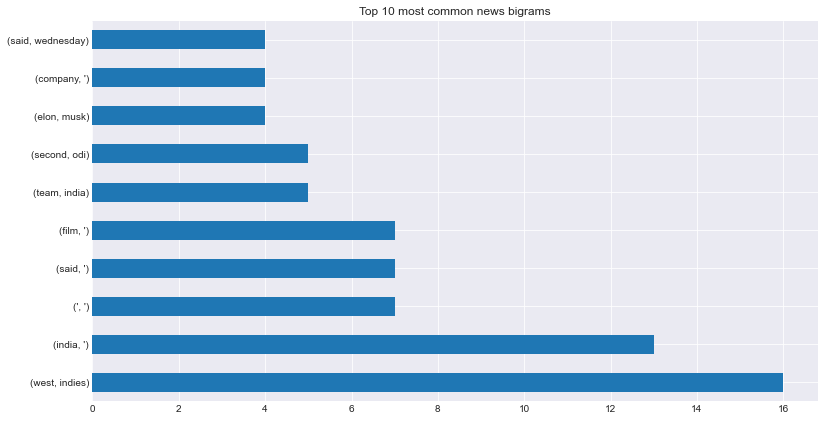

In [42]:
# Bigrams
pd.Series(nltk.bigrams(all_news_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common news bigrams')

Text(0.5, 1.0, 'Top 10 most common news bigrams')

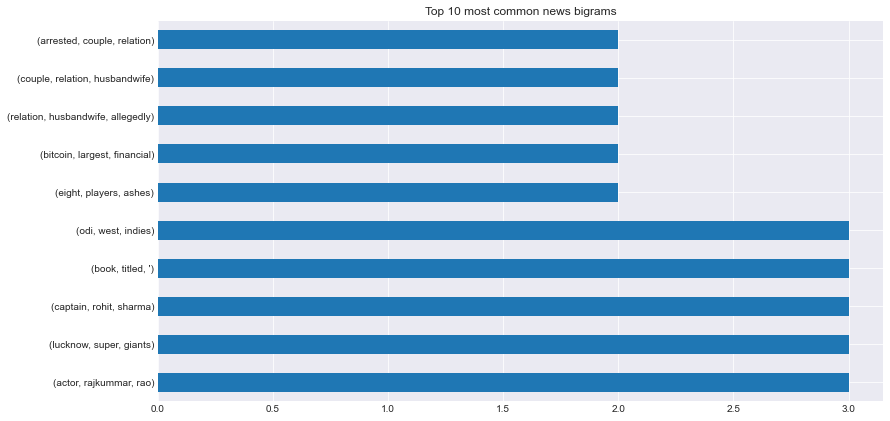

In [43]:
# Trigrams
pd.Series(nltk.trigrams(all_news_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common news bigrams')

In [44]:
# bigrams from DataFrame
all_news_words_bigram = pd.DataFrame(nltk.bigrams(all_news_words.split()))
all_news_words_bigram 

,0,1
0,fm,nirmala
1,nirmala,sitharaman
2,sitharaman,stated
3,stated,pm
4,pm,gati
...,...,...
3879,see,beautiful
3880,beautiful,sparkly
3881,sparkly,ring
3882,ring,finger


In [45]:
# trigrams from DataFrame
all_news_words_trigram = pd.DataFrame(nltk.trigrams(all_news_words.split()))
all_news_words_trigram.head()

,0,1,2
0,fm,nirmala,sitharaman
1,nirmala,sitharaman,stated
2,sitharaman,stated,pm
3,stated,pm,gati
4,pm,gati,shakti


(-0.5, 399.5, 199.5, -0.5)

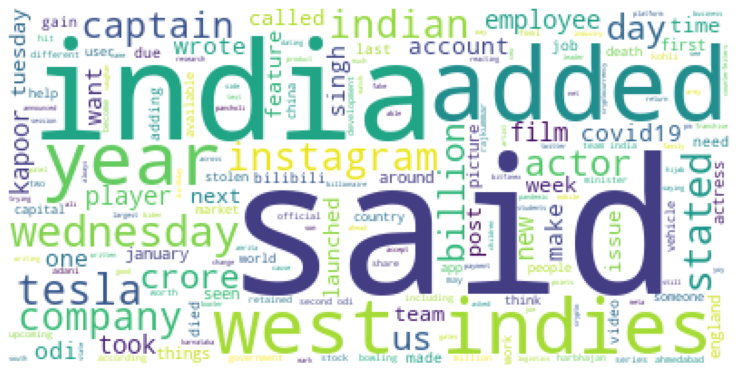

In [46]:
img = WordCloud(background_color='white').generate(all_news_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')

# Exploration Based on Lesson

In [48]:
news_df.head()

,title,author,content,date,category
0,Huge boost for the logistics sector: Windmill ...,Roshan Gupta,FM Nirmala Sitharaman stated that PM Gati Shak...,"09 Feb 2022,Wednesday",business
1,Bill Gates writes a book on how to make COVID-...,Pragya Swastik,Microsoft Co-founder Bill Gates has written a ...,"09 Feb 2022,Wednesday",business
2,Glenmark launches anti-COVID-19 nasal spray th...,Kiran Khatri,"Glenmark Pharma, in partnership with Canada-ba...","09 Feb 2022,Wednesday",business
3,"25-yr-old employee's death sparks overwork, '9...",Pragya Swastik,A 25-year-old content moderator working for Ch...,"09 Feb 2022,Wednesday",business
4,Joe Biden acknowledges Tesla as 'US' largest e...,Kiran Khatri,US President Joe Biden on Tuesday acknowledged...,"09 Feb 2022,Wednesday",business


In [49]:
# dropping columns title, author and date for making it easy
news_df = news_df.drop(columns = ['title', 'author', 'date'])

In [50]:
news_df

,content,category
0,FM Nirmala Sitharaman stated that PM Gati Shak...,business
1,Microsoft Co-founder Bill Gates has written a ...,business
2,"Glenmark Pharma, in partnership with Canada-ba...",business
3,A 25-year-old content moderator working for Ch...,business
4,US President Joe Biden on Tuesday acknowledged...,business
...,...,...
94,Filmmaker Vivek Ranjan Agnihotri has revealed ...,entertainment
95,Actor Rajkummar Rao has said that 'lavender ma...,entertainment
96,Actor-politician Kamal Haasan on Wednesday com...,entertainment
97,"'Qissa' director Anup Singh, who announced his...",entertainment


In [51]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [53]:
catgories = pd.concat([news_df.category.value_counts(),
                    news_df.category.value_counts(normalize=True)], axis=1)
catgories.columns = ['n', 'percent']
catgories


,n,percent
sports,25,0.252525
technology,25,0.252525
entertainment,25,0.252525
business,24,0.242424


In [57]:
def show_counts_and_ratios(news_df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    categories = pd.concat([news_df[column].value_counts(),
                    news_df[column].value_counts(normalize=True)], axis=1)
    categories.columns = ['n', 'percent']
    categories
    return categories

show_counts_and_ratios(news_df, "category")


,n,percent
sports,25,0.252525
technology,25,0.252525
entertainment,25,0.252525
business,24,0.242424


In [61]:
sports_words = clean(' '.join(news_df[news_df.category == 'sports'].content))
technology_words = clean(' '.join(news_df[news_df.category == 'technology'].content))
entertainment_words = clean(' '.join(news_df[news_df.category == 'entertainment'].content))
business_words = clean(' '.join(news_df[news_df.category == 'business'].content))
all_words = clean(' '.join(news_df.content))

In [62]:
sports_freq = pd.Series(sports_words).value_counts()
technology_freq = pd.Series(technology_words).value_counts()
entertainment_freq = pd.Series(entertainment_words).value_counts()
business_freq = pd.Series(business_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

business_freq.head()


said       15
crore       9
company     8
billion     8
year        7
dtype: int64

In [63]:
word_counts = (pd.concat([all_freq, sports_freq, technology_freq, entertainment_freq, business_freq], axis=1, sort=True)
                .set_axis(['all', 'sports', 'technology', 'entertainment', 'business'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()


,all,sports,technology,entertainment,business
03,1,1,0,0,0
039,1,0,0,0,1
1,1,0,1,0,0
10,2,0,1,0,1
100,3,0,1,0,2


In [64]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,sports,technology,entertainment,business
said,72,15,22,20,15
india,37,20,8,2,7
added,19,4,5,5,5
instagram,19,1,11,6,1
west,17,16,0,1,0
indie,17,17,0,0,0
company,15,1,6,0,8
also,15,2,6,4,3
year,15,1,1,6,7
wednesday,14,0,4,4,6
